# Sensitivity of emissions metrics to categorisation

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path

import matplotlib.pyplot as plt
import pandas as pd
import scmdata
import scmdata.database
import seaborn as sns
import tqdm.autonotebook as tqdman

import utils
import utils.categorisation
import utils.plotting

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/nicholls-et-al-2022-emulator-changes/lib/python3.7/site-packages/scmdata/database.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 10
# plt.rcParams["figure.figsize"] = [12, 8]

<IPython.core.display.Javascript object>

In [4]:
categorisations = pd.read_csv(
    os.path.join(
        utils.DATA_DIR,
        "processed",
        "categorisation",
        "standard_categorisation.csv"
        #         "historical_sensitivity_categorisation.csv",
    )
)
categorisations

model                scenario            category  \
0           AIM/CGE 2.0  ADVANCE_2020_1.5C-2100  1.5C low overshoot   
1           AIM/CGE 2.0      ADVANCE_2020_Med2C           Higher 2C   
2           AIM/CGE 2.0       ADVANCE_2020_WB2C            Lower 2C   
3           AIM/CGE 2.0      ADVANCE_2030_Med2C            Above 2C   
4           AIM/CGE 2.0  ADVANCE_2030_Price1.5C            Lower 2C   
...                 ...                     ...                 ...   
2049  WITCH-GLOBIOM 4.4            CD-LINKS_NPi            Above 2C   
2050  WITCH-GLOBIOM 4.4   CD-LINKS_NPi2020_1000  1.5C low overshoot   
2051  WITCH-GLOBIOM 4.4   CD-LINKS_NPi2020_1600            Lower 2C   
2052  WITCH-GLOBIOM 4.4    CD-LINKS_NPi2020_400          Below 1.5C   
2053  WITCH-GLOBIOM 4.4       CD-LINKS_NoPolicy            Above 2C   

                    subcategory                                           id  
0      Lower 1.5C low overshoot   SR1.5 calibration SR1.5 processing MAGICC6  
1                     Higher 2C   SR1.5 calibration SR1.5 processing MAGICC6  
2                      Lower 2C   SR1.5 calibration SR1.5 processing MAGICC6  
3                      Above 2C   SR1.5 calibration SR1.5 processing MAGICC6  
4                      Lower 2C   SR1.5 calibration SR1.5 processing MAGICC6  
...                         ...                                          ...  
2049                   Above 2C  AR6 calibration SR1.5 processing FaIRv1.6.2  
2050  Higher 1.5C low overshoot  AR6 calibration SR1.5 processing FaIRv1.6.2  
2051                   Lower 2C  AR6 calibration SR1.5 processing FaIRv1.6.2  
2052            Below 1.5C (II)  AR6 calibration SR1.5 processing FaIRv1.6.2  
2053                   Above 2C  AR6 calibration SR1.5 processing FaIRv1.6.2  

[2054 rows x 5 columns]

<IPython.core.display.Javascript object>

In [5]:
categorisations_pivot = categorisations.pivot_table(
    values="category",
    index=["model", "scenario"],
    columns=["id"],
    aggfunc=lambda x: x,
)
categorisations_pivot

id                                       AR6 calibration SR1.5 processing FaIRv1.6.2  \
model             scenario                                                             
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                  Below 1.5C   
                  ADVANCE_2020_Med2C                                        Lower 2C   
                  ADVANCE_2020_WB2C                                       Below 1.5C   
                  ADVANCE_2030_Med2C                                       Higher 2C   
                  ADVANCE_2030_Price1.5C                          1.5C low overshoot   
...                                                                              ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi                                              Above 2C   
                  CD-LINKS_NPi2020_1000                           1.5C low overshoot   
                  CD-LINKS_NPi2020_1600                                     Lower 2C   
                  CD-LINKS_NPi2020_400                                    Below 1.5C   
                  CD-LINKS_NoPolicy                                         Above 2C   

id                                       AR6 calibration SR1.5 processing MAGICCv7.5.3  \
model             scenario                                                               
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                            1.5C low overshoot   
                  ADVANCE_2020_Med2C                                         Higher 2C   
                  ADVANCE_2020_WB2C                                 1.5C low overshoot   
                  ADVANCE_2030_Med2C                                          Above 2C   
                  ADVANCE_2030_Price1.5C                           1.5C high overshoot   
...                                                                                ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi                                                Above 2C   
                  CD-LINKS_NPi2020_1000                             1.5C low overshoot   
                  CD-LINKS_NPi2020_1600                                       Lower 2C   
                  CD-LINKS_NPi2020_400                              1.5C low overshoot   
                  CD-LINKS_NoPolicy                                           Above 2C   

id                                       RCMIP Phase 2 calibration SR1.5 processing MAGICCv7.5.3  \
model             scenario                                                                         
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                         Below 1.5C        
                  ADVANCE_2020_Med2C                                               Lower 2C        
                  ADVANCE_2020_WB2C                                              Below 1.5C        
                  ADVANCE_2030_Med2C                                              Higher 2C        
                  ADVANCE_2030_Price1.5C                                1.5C high overshoot        
...                                                                                     ...        
WITCH-GLOBIOM 4.4 CD-LINKS_NPi                                                     Above 2C        
                  CD-LINKS_NPi2020_1000                                          Below 1.5C        
                  CD-LINKS_NPi2020_1600                                            Lower 2C        
                  CD-LINKS_NPi2020_400                                           Below 1.5C        
                  CD-LINKS_NoPolicy                                                Above 2C        

id                                       SR1.5 calibration SR1.5 processing FaIR1.3  \
model             scenario                                                            
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                 Below 1.5C   
                  ADVANCE_2020_Med2C                                       Lower 2C   
                  ADVANCE_2020_WB2C

<IPython.core.display.Javascript object>

In [6]:
sr15_db = scmdata.database.ScmDatabase(
    os.path.join(utils.DATA_DIR, "processed", os.path.join("sr15-output")),
    levels=("variable", "percentile"),
)
sr15_emissions = sr15_db.load(variable="Emissions|CO2")
sr15_emissions

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 414, timepoints: 33)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	    Kyoto-GHG|2010 (SAR) SR1.5 Table 2.4 aim_over_sampling   climate_model  \
	0                exclude           False             False  not_applicable   
	1                exclude           False             False  not_applicable   
	2                exclude           False             False  not_applicable   
	3                exclude           False             False  not_applicable   
	4                exclude           False             False  not_applicable   
	..                   ...             ...               ...             ...   
	409             in range           False              True  not_applicable   
	410             in range           False              True  not_applicable   
	411             in range           False              True  not_applicable   
	412             in range           False              True  not_applicable   
	413          

<IPython.core.display.Javascript object>

Restrict to only scenarios with a climate assessment.

In [7]:
mod_scen_idx = ["model", "scenario"]

<IPython.core.display.Javascript object>

In [8]:
# categorisations_pivot = categorisations_pivot.reset_index()
# categorisations_pivot["model"] = categorisations_pivot["model"].apply(
#     utils.compat.rename_model_to_sr15_names
# )
# categorisations_pivot["scenario"] = categorisations_pivot["scenario"].apply(
#     utils.compat.rename_scenario_to_sr15_names
# )
# categorisations_pivot = categorisations_pivot.set_index(["model", "scenario"])
# categorisations_pivot

<IPython.core.display.Javascript object>

In [9]:
sr15_emissions_climate_assessment = (
    scmdata.ScmRun(
        sr15_emissions.timeseries()
        .reset_index()
        .set_index(mod_scen_idx)
        .loc[categorisations_pivot.index]
        .join(categorisations_pivot)
    )
    .drop_meta(["climate_model", "methodology", "percentile"])
    .filter(year=range(2010, 2100 + 1))
    .resample("AS")
)

sr15_emissions_climate_assessment

<scmdata.ScmRun (timeseries: 411, timepoints: 91)>
Time:
	Start: 2010-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	    AR6 calibration SR1.5 processing FaIRv1.6.2  \
	0                                    Below 1.5C   
	1                                      Lower 2C   
	2                                    Below 1.5C   
	3                                     Higher 2C   
	4                            1.5C low overshoot   
	..                                          ...   
	406                                    Above 2C   
	407                          1.5C low overshoot   
	408                                    Lower 2C   
	409                                  Below 1.5C   
	410                                    Above 2C   
	
	    AR6 calibration SR1.5 processing MAGICCv7.5.3 Kyoto-GHG|2010 (SAR)  \
	0                              1.5C low overshoot             in range   
	1                                       Higher 2C             in range   
	2                              

<IPython.core.display.Javascript object>

In [10]:
def get_peak_year(run, time_axis="year"):
    ts = run.timeseries(time_axis=time_axis)
    return ts.idxmax(axis=1)


def get_peak(run, time_axis="year"):
    ts = run.timeseries(time_axis=time_axis)
    return ts.max(axis=1)


def get_reduction_year(run, rel_year, reduction, time_axis="year"):
    ts = run.timeseries(time_axis=time_axis)
    ts_rel = run.filter(year=rel_year).timeseries(time_axis=time_axis)[rel_year]
    ts = ts.divide(ts_rel, axis="rows")
    display(ts)

    out = (ts <= (1 - reduction)).idxmax(axis=1)
    out = out.astype("Int64")
    out[out == run["year"].min()] = pd.NA

    return out


def get_net_zero(run, time_axis="year"):
    ts = run.timeseries(time_axis=time_axis)
    out = (ts <= 0).idxmax(axis=1)
    out = out.astype("Int64")
    out[out == run["year"].min()] = pd.NA

    return out

<IPython.core.display.Javascript object>

In [11]:
emms_co2_world = sr15_emissions_climate_assessment.filter(
    variable="Emissions|CO2", region="World"
)

summary_stats_columns = set(
    ["scenario", "model", "SR1.5 Table 2.4"] + categorisations_pivot.columns.tolist()
)
summary_stats = {}
for stat_name, run, calc_func, calc_func_kwargs in tqdman.tqdm(
    (
        (
            "Net zero CO2 year",
            emms_co2_world,
            get_net_zero,
            {},
        ),
        (
            "Half (rel. 2010) CO2 year",
            emms_co2_world,
            get_reduction_year,
            {"rel_year": 2010, "reduction": 1 / 2},
        ),
        (
            "90% (rel. 2010) CO2 year",
            emms_co2_world,
            get_reduction_year,
            {"rel_year": 2010, "reduction": 0.9},
        ),
        (
            "Peak CO2 emissions year",
            emms_co2_world,
            get_peak_year,
            {},
        ),
        (
            "Peak CO2 emissions (GtCO2 / yr)",
            emms_co2_world.convert_unit("GtCO2 / yr"),
            get_peak,
            {},
        ),
    )
):
    stat = calc_func(run, **calc_func_kwargs)
    drop_levels = list(set(stat.index.names) - summary_stats_columns)
    stat_clean = stat.reset_index(drop_levels, drop=True)
    summary_stats[stat_name] = stat_clean

summary_stats = pd.DataFrame(summary_stats)
summary_stats

  0%|          | 0/5 [00:00<?, ?it/s]

time                                                                                                                                                                                                                                                                                                                                                               2010  \
AR6 calibration SR1.5 processing FaIRv1.6.2 AR6 calibration SR1.5 processing MAGICCv7.5.3 Kyoto-GHG|2010 (SAR) RCMIP Phase 2 calibration SR1.5 processing MAGI... SR1.5 Table 2.4 SR1.5 calibration SR1.5 processing FaIR1.3 SR1.5 calibration SR1.5 processing MAGICC6 aim_over_sampling model             region scenario               unit      variable              
Below 1.5C                                  1.5C low overshoot                            in range             Below 1.5C                                         True            Below 1.5C                                 1.5C low overshoot                         False             AIM/CGE 2.0       World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Emissions|CO2   1.0   
Lower 2C                                    Higher 2C                                     in range             Lower 2C                                           True            Lower 2C                                   Higher 2C                                  False             AIM/CGE 2.0       World  ADVANCE_2020_Med2C     Mt CO2/yr Emissions|CO2   1.0   
Below 1.5C                                  1.5C low overshoot                            in range             Below 1.5C                                         True            Below 1.5C                                 Lower 2C                                   False             AIM/CGE 2.0       World  ADVANCE_2020_WB2C      Mt CO2/yr Emissions|CO2   1.0   
Higher 2C                                   Above 2C                                      in range             Higher 2C                                          True            Lower 2C                                   Above 2C                                   False             AIM/CGE 2.0       World  ADVANCE_2030_Med2C     Mt CO2/yr Emissions|CO2   1.0   
1.5C low overshoot                          1.5C high overshoot                           in range             1.5C high overshoot                                True            Below 1.5C                                 Lower 2C                                   False             AIM/CGE 2.0       World  ADVANCE_2030_Price1.5C Mt CO2/yr Emissions|CO2   1.0   
...                                                                                                                                                                                                                                                                                                                                                                 ...   
Above 2C                                    Above 2C                                      in range             Above 2C                                           True            Above 2C                                   Above 2C                                   False             WITCH-GLOBIOM 4.4 World  CD-LINKS_NPi           Mt CO2/yr Emissions|CO2   1.0   
1.5C low overshoot                          1.5C low overshoot                            in range             Below 1.5C                                         True            Below 1.5C                                 1.5C low overshoot                         False             WITCH-GLOBIOM 4.4 World  CD-LINKS_NPi2020_1000  Mt CO2/yr Emissions|CO2   1.0   
Lower 2C                                    Lower 2C                                      in range             Lower 2C                                           True            Lower 2C                                   Lower 2C                                   False             WITCH-GLOBIOM 4.4 World  CD-LINKS_NPi2020_1600  Mt CO2/yr Emissions|CO2   1.0   
Below 1

time                                                                                                                                                                                                                                                                                                                                                               2010  \
AR6 calibration SR1.5 processing FaIRv1.6.2 AR6 calibration SR1.5 processing MAGICCv7.5.3 Kyoto-GHG|2010 (SAR) RCMIP Phase 2 calibration SR1.5 processing MAGI... SR1.5 Table 2.4 SR1.5 calibration SR1.5 processing FaIR1.3 SR1.5 calibration SR1.5 processing MAGICC6 aim_over_sampling model             region scenario               unit      variable              
Below 1.5C                                  1.5C low overshoot                            in range             Below 1.5C                                         True            Below 1.5C                                 1.5C low overshoot                         False             AIM/CGE 2.0       World  ADVANCE_2020_1.5C-2100 Mt CO2/yr Emissions|CO2   1.0   
Lower 2C                                    Higher 2C                                     in range             Lower 2C                                           True            Lower 2C                                   Higher 2C                                  False             AIM/CGE 2.0       World  ADVANCE_2020_Med2C     Mt CO2/yr Emissions|CO2   1.0   
Below 1.5C                                  1.5C low overshoot                            in range             Below 1.5C                                         True            Below 1.5C                                 Lower 2C                                   False             AIM/CGE 2.0       World  ADVANCE_2020_WB2C      Mt CO2/yr Emissions|CO2   1.0   
Higher 2C                                   Above 2C                                      in range             Higher 2C                                          True            Lower 2C                                   Above 2C                                   False             AIM/CGE 2.0       World  ADVANCE_2030_Med2C     Mt CO2/yr Emissions|CO2   1.0   
1.5C low overshoot                          1.5C high overshoot                           in range             1.5C high overshoot                                True            Below 1.5C                                 Lower 2C                                   False             AIM/CGE 2.0       World  ADVANCE_2030_Price1.5C Mt CO2/yr Emissions|CO2   1.0   
...                                                                                                                                                                                                                                                                                                                                                                 ...   
Above 2C                                    Above 2C                                      in range             Above 2C                                           True            Above 2C                                   Above 2C                                   False             WITCH-GLOBIOM 4.4 World  CD-LINKS_NPi           Mt CO2/yr Emissions|CO2   1.0   
1.5C low overshoot                          1.5C low overshoot                            in range             Below 1.5C                                         True            Below 1.5C                                 1.5C low overshoot                         False             WITCH-GLOBIOM 4.4 World  CD-LINKS_NPi2020_1000  Mt CO2/yr Emissions|CO2   1.0   
Lower 2C                                    Lower 2C                                      in range             Lower 2C                                           True            Lower 2C                                   Lower 2C                                   False             WITCH-GLOBIOM 4.4 World  CD-LINKS_NPi2020_1600  Mt CO2/yr Emissions|CO2   1.0   
Below 1

Net zero CO2 year  \
AR6 calibration SR1.5 processing FaIRv1.6.2 AR6 calibration SR1.5 processing MAGICCv7.5.3 RCMIP Phase 2 calibration SR1.5 processing MAGI... SR1.5 Table 2.4 SR1.5 calibration SR1.5 processing FaIR1.3 SR1.5 calibration SR1.5 processing MAGICC6 model             scenario                                    
Below 1.5C                                  1.5C low overshoot                            Below 1.5C                                         True            Below 1.5C                                 1.5C low overshoot                         AIM/CGE 2.0       ADVANCE_2020_1.5C-2100               2045   
Lower 2C                                    Higher 2C                                     Lower 2C                                           True            Lower 2C                                   Higher 2C                                  AIM/CGE 2.0       ADVANCE_2020_Med2C                   <NA>   
Below 1.5C                                  1.5C low overshoot                            Below 1.5C                                         True            Below 1.5C                                 Lower 2C                                   AIM/CGE 2.0       ADVANCE_2020_WB2C                    2088   
Higher 2C                                   Above 2C                                      Higher 2C                                          True            Lower 2C                                   Above 2C                                   AIM/CGE 2.0       ADVANCE_2030_Med2C                   <NA>   
1.5C low overshoot                          1.5C high overshoot                           1.5C high overshoot                                True            Below 1.5C                                 Lower 2C                                   AIM/CGE 2.0       ADVANCE_2030_Price1.5C               2051   
...                                                                                                                                                                                                                                                                                                        ...   
Above 2C                                    Above 2C                                      Above 2C                                           True            Above 2C                                   Above 2C                                   WITCH-GLOBIOM 4.4 CD-LINKS_NPi                         <NA>   
1.5C low overshoot                          1.5C low overshoot                            Below 1.5C                                         True            Below 1.5C                                 1.5C low overshoot                         WITCH-GLOBIOM 4.4 CD-LINKS_NPi2020_1000                2075   
Lower 2C                                    Lower 2C                                      Lower 2C                                           True            Lower 2C                                   Lower 2C                                   WITCH-GLOBIOM 4.4 CD-LINKS_NPi2020_1600                2095   
Below 1.5C                                  1.5C low overshoot                            Below 1.5C                                         True            Below 1.5C                                 Below 1.5C                                 WITCH-GLOBIOM 4.4 CD-LINKS_NPi2020_400                 2054   
Above 2C                                    Above 2C                                      Above 2C                                           True            Above 2C                                   Above 2C                                   WITCH-GLOBIOM 4.4 CD-LINKS_NoPolicy                    <NA>   

                                                                                                                                                                                                                                                                                             Half (rel. 2010) CO2 

<IPython.core.display.Javascript object>

In [12]:
cat_cols = categorisations_pivot.columns.tolist()
val_cols = summary_stats.columns.tolist()
sns_df = (
    summary_stats.reset_index(cat_cols)
    .set_index(val_cols, append=True)
    .melt(
        var_name="Categorisation id",
        value_name="category",
        ignore_index=False,
    )
    .reset_index()
)
sns_df

SR1.5 Table 2.4              model                scenario  \
0               True        AIM/CGE 2.0  ADVANCE_2020_1.5C-2100   
1               True        AIM/CGE 2.0      ADVANCE_2020_Med2C   
2               True        AIM/CGE 2.0       ADVANCE_2020_WB2C   
3               True        AIM/CGE 2.0      ADVANCE_2030_Med2C   
4               True        AIM/CGE 2.0  ADVANCE_2030_Price1.5C   
...              ...                ...                     ...   
2050            True  WITCH-GLOBIOM 4.4            CD-LINKS_NPi   
2051            True  WITCH-GLOBIOM 4.4   CD-LINKS_NPi2020_1000   
2052            True  WITCH-GLOBIOM 4.4   CD-LINKS_NPi2020_1600   
2053            True  WITCH-GLOBIOM 4.4    CD-LINKS_NPi2020_400   
2054            True  WITCH-GLOBIOM 4.4       CD-LINKS_NoPolicy   

      Net zero CO2 year  Half (rel. 2010) CO2 year  90% (rel. 2010) CO2 year  \
0                2045.0                     2032.0                    2042.0   
1                   NaN                     2049.0                       NaN   
2                2088.0                     2033.0                    2056.0   
3                   NaN                     2040.0                       NaN   
4                2051.0                     2035.0                    2045.0   
...                 ...                        ...                       ...   
2050                NaN                        NaN                       NaN   
2051             2075.0                     2036.0                    2065.0   
2052             2095.0                     2051.0                    2086.0   
2053             2054.0                     2029.0                    2047.0   
2054                NaN                        NaN                       NaN   

      Peak CO2 emissions year  Peak CO2 emissions (GtCO2 / yr)  \
0                        2020                        43.907550   
1                        2020                        43.943277   
2                        2020                        43.943277   
3                        2020                        43.970330   
4                        2020                        44.557478   
...                       ...                              ...   
2050                     2090                        83.021414   
2051                     2020                        40.656527   
2052                     2020                        40.656527   
2053                     2020                        40.656527   
2054                     2090                        84.177359   

                                Categorisation id            category  
0     AR6 calibration SR1.5 processing FaIRv1.6.2          Below 1.5C  
1     AR6 calibration SR1.5 processing FaIRv1.6.2            Lower 2C  
2     AR6 calibration SR1.5 processing FaIRv1.6.2          Below 1.5C  
3     AR6 calibration SR1.5 processing FaIRv1.6.2           Higher 2C  
4     AR6 calibration SR1.5 processing FaIRv1.6.2  1.5C low overshoot  
...                                           ...                 ...  
2050   SR1.5 calibration SR1.5 processing MAGICC6            Above 2C  
2051   SR1.5 calibration SR1.5 processing MAGICC6  1.5C low overshoot  
2052   SR1.5 calibration SR1.5 processing MAGICC6            Lower 2C  
2053   SR1.5 calibration SR1.5 processing MAGICC6          Below 1.5C  
2054   SR1.5 calibration SR1.5 processing MAGICC6            Above 2C  

[2055 rows x 10 columns]

<IPython.core.display.Javascript object>

In [13]:
sorted(sns_df["Categorisation id"].unique().tolist())

['AR6 calibration SR1.5 processing FaIRv1.6.2',
 'AR6 calibration SR1.5 processing MAGICCv7.5.3',
 'RCMIP Phase 2 calibration SR1.5 processing MAGICCv7.5.3',
 'SR1.5 calibration SR1.5 processing FaIR1.3',
 'SR1.5 calibration SR1.5 processing MAGICC6']

<IPython.core.display.Javascript object>

Net zero CO2 year               \
                                                          count         mean   
Scenario category         Emulator                                             
1.5C high overshoot       AR6 FaIRv1.6.2                   19.0  2055.894737   
                          AR6 MAGICCv7.5.3                 38.0  2052.210526   
                          RCMIP2 MAGICCv7.5.3              39.0  2059.102564   
                          SR1.5 FaIR1.3                     1.0  2067.000000   
                          SR1.5 MAGICC6                    36.0  2053.555556   
1.5C low overshoot        AR6 FaIRv1.6.2                   42.0  2054.904762   
                          AR6 MAGICCv7.5.3                 41.0  2052.951220   
                          RCMIP2 MAGICCv7.5.3              48.0  2063.145833   
                          SR1.5 FaIR1.3                    22.0  2063.818182   
                          SR1.5 MAGICC6                    37.0  2052.054054   
1.5C no and low overshoot AR6 FaIRv1.6.2                   78.0  2053.730769   
                          AR6 MAGICCv7.5.3                 41.0  2052.951220   
                          RCMIP2 MAGICCv7.5.3              87.0  2058.735632   
                          SR1.5 FaIR1.3                   145.0  2060.255172   
                          SR1.5 MAGICC6                    42.0  2051.166667   
Above 2C                  AR6 FaIRv1.6.2                    7.0  2091.142857   
                          AR6 MAGICCv7.5.3                 23.0  2085.260870   
                          RCMIP2 MAGICCv7.5.3              10.0  2088.900000   
                          SR1.5 FaIR1.3                     0.0          NaN   
                          SR1.5 MAGICC6                    20.0  2088.400000   
Below 1.5C                AR6 FaIRv1.6.2                   36.0  2052.361111   
                          RCMIP2 MAGICCv7.5.3              39.0  2053.307692   
                          SR1.5 FaIR1.3                   123.0  2059.617886   
                          SR1.5 MAGICC6                     5.0  2044.600000   
Higher 2C                 AR6 FaIRv1.6.2                   19.0  2087.105263   
                          AR6 MAGICCv7.5.3                 29.0  2075.655172   
                          RCMIP2 MAGICCv7.5.3              17.0  2082.647059   
                          SR1.5 FaIR1.3                     7.0  2089.428571   
                          SR1.5 MAGICC6                    38.0  2075.631579   
Lower 2C                  AR6 FaIRv1.6.2                   64.0  2074.328125   
                          AR6 MAGICCv7.5.3                 56.0  2071.303571   
                          RCMIP2 MAGICCv7.5.3              34.0  2076.294118   
                          SR1.5 FaIR1.3                    33.0  2084.909091   
                          SR1.5 MAGICC6                    51.0  2070.274510   

                                                                           \
                                                     std     min       5%   
Scenario category         Emulator                                          
1.5C high overshoot       AR6 FaIRv1.6.2        6.967342  2047.0  2047.90   
                          AR6 MAGICCv7.5.3      5.378425  2043.0  2044.00   
                          RCMIP2 MAGICCv7.5.3  10.379116  2044.0  2046.90   
                          SR1.5 FaIR1.3              NaN  2067.0  2067.00   
                          SR1.5 MAGICC6         5.925463  2044.0  2046.00   
1.5C low overshoot        AR6 FaIRv1.6.2        9.054872  2043.0  2044.10   
                          AR6 MAGICCv7.5.3     10.726023  2037.0  2038.00   
                          RCMIP2 MAGICCv7.5.3  14.564588  2043.0  2046.70   
                          SR1.5 FaIR1.3         8.829800  2048.0  2050.05   
                          SR1.5 MAGICC6         8.624725  2038.0  2042.20   
1.5C no and low overshoot AR6 FaIRv1.6.2        9.399742  2037.0  2042.40   
       

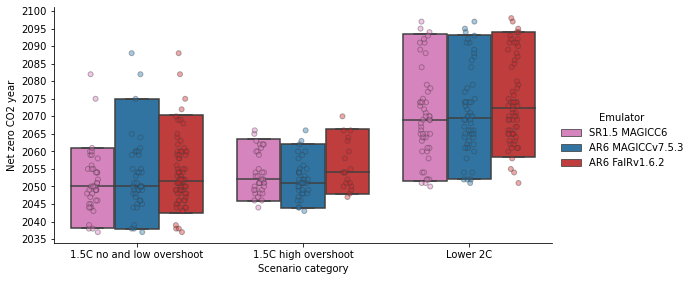

<IPython.core.display.Javascript object>

In [14]:
pdf = sns_df[sns_df["SR1.5 Table 2.4"] == "True"]

no_and_low_overshoot = pdf[
    pdf["category"].isin(["Below 1.5C", "1.5C low overshoot"])
].copy()
no_and_low_overshoot["category"] = "1.5C no and low overshoot"
pdf = pdf.append(no_and_low_overshoot)

order = [
    #     "Below 1.5C",
    #     "1.5C low overshoot",
    "1.5C no and low overshoot",
    "1.5C high overshoot",
    "Lower 2C",
    #     "Higher 2C",
    #     "Above 2C",
]
hue_order = [
    "SR1.5 calibration SR1.5 processing MAGICC6",
    #     "SR1.5 calibration SR1.5 processing FaIR1.3",
    "AR6 calibration SR1.5 processing MAGICCv7.5.3",
    "AR6 calibration SR1.5 processing FaIRv1.6.2",
    #     "RCMIP Phase 2 calibration SR1.5 processing MAGICCv7.5.3",
]
# hue_order = sorted(sns_df["Categorisation id"].unique().tolist())
# hue_order = [
#     "AR6 calibration SR1.5 processing MAGICCv7.5.3 -0.2 shift",
#     "AR6 calibration SR1.5 processing MAGICCv7.5.3 -0.15 shift",
#     "AR6 calibration SR1.5 processing MAGICCv7.5.3 -0.1 shift",
#     "AR6 calibration SR1.5 processing MAGICCv7.5.3 -0.05 shift",
#     "AR6 calibration SR1.5 processing MAGICCv7.5.3 -0.0 shift",
#     "AR6 calibration SR1.5 processing MAGICCv7.5.3 0.05 shift",
#     "AR6 calibration SR1.5 processing MAGICCv7.5.3 0.1 shift",
#     "AR6 calibration SR1.5 processing MAGICCv7.5.3 0.15 shift",
#     "AR6 calibration SR1.5 processing MAGICCv7.5.3 0.2 shift",
# ]

x = "Scenario category"
pdf["Scenario category"] = pdf["category"]

hue = "Emulator"
pdf["Emulator"] = pdf["Categorisation id"].map(utils.plotting.ID_MAP)
hue_order = [utils.plotting.ID_MAP[v] for v in hue_order]

y = "Net zero CO2 year"
yticks = range(2035, 2100 + 1, 5)
# y = "Peak CO2 emissions year"
# yticks = range(2010, 2030 + 1, 5)
# y = "Half (rel. 2010) CO2 year"
# yticks = range(2010, 2050 + 1, 5)
# y = "90% (rel. 2010) CO2 year"
# yticks = range(2035, 2100 + 1, 5)

pkwargs = dict(
    x=x,
    hue=hue,
    palette={utils.plotting.ID_MAP[k]: v for k, v in utils.plotting.ID_COLOURS.items()},
    y=y,
    hue_order=hue_order,
    dodge=True,
    order=order,
)

description = pdf.groupby([x, hue]).describe(percentiles=[0.05, 0.5, 0.95])
box_df = []
for (x_val, hue_val), subdf in description.groupby([x, hue]):
    tmp_base = {x: x_val, hue: hue_val}

    for c, count in (("5%", 50), ("50%", 1), ("95%", 50)):
        for _ in range(count):
            box_df.append({**tmp_base, y: float(subdf[y][c])})

box_df = pd.DataFrame(box_df)

fg = sns.catplot(
    data=box_df,
    **pkwargs,
    kind="box",
    fliersize=0,
    height=4,
    aspect=2,
    #     medianprops={"linewidth": 3, "color": "white"},
)

ax = fg.axes[0][0]

sns.stripplot(
    data=pdf,
    **pkwargs,
    alpha=0.4,
    ax=ax,
    linewidth=1,
    edgecolor="gray",
)
ax.legend().remove()
ax.set_yticks(yticks)
# ax.grid()
plt.savefig(
    os.path.join(utils.FIGURES_DIR, f"200_net-zero-changes.pdf"),
    transparent=True,
)

description

In [15]:
pdf.groupby([x, hue])["model"].count().reindex(
    utils.plotting.CATEGORY_ORDER, level=0
).reindex(hue_order, level=1).unstack(hue).fillna(
    0
)  # .sum(axis=0)

Emulator             SR1.5 MAGICC6  AR6 MAGICCv7.5.3  AR6 FaIRv1.6.2
Scenario category                                                   
Below 1.5C                     5.0               0.0            36.0
1.5C low overshoot            37.0              41.0            42.0
1.5C high overshoot           36.0              38.0            19.0
Lower 2C                      54.0              64.0            92.0
Higher 2C                     54.0              52.0            36.0
Above 2C                     182.0             173.0           143.0

<IPython.core.display.Javascript object>